In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("dataset/top_insta_influencers_data.csv")
dataset.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [3]:
dataset.isnull().sum()

rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [5]:
data = dataset['country'].mode()[0]
data

'United States'

In [7]:
# Replaced the Nan values with most frequent values from the column
dataset['country'] = dataset['country'].fillna("United States")


In [8]:
dataset.isnull().sum()

rank                 0
channel_info         0
influence_score      0
posts                0
followers            0
avg_likes            0
60_day_eng_rate      0
new_post_avg_like    0
total_likes          0
country              0
dtype: int64

In [9]:
# Removed the 'rank' column as it is of no use because our target variable is 'influence_score'

dataset.drop(['rank', 'channel_info'], axis=1, inplace=True)
dataset.head()

,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,United States
3,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [10]:
def convert_to_number(value):
    if 'm' in value:
        return float(value.replace('m', ''))
    elif '%' in value:
        return float(value.replace('%', ''))
    elif 'b' in value:
        return float(value.replace('b', ''))
    elif 'k' in value:
        return float(value.replace('k', ''))
    
    else:
        return float(value)

In [11]:
cols_to_convert = ["posts", 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']
dataset[cols_to_convert] = dataset[cols_to_convert].map(convert_to_number)

dataset.head()

,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,92,3.30,475.8,8.7,1.39,6.5,29.0,Spain
1,91,6.90,366.2,8.3,1.62,5.9,57.4,United States
2,90,0.89,357.3,6.8,1.24,4.4,6.0,United States
3,93,1.80,342.7,6.2,0.97,3.3,11.5,United States
4,91,6.80,334.1,1.9,0.20,665.3,12.5,United States


In [12]:
# Replace the NaN value with the mean value of the column 
dataset['60_day_eng_rate'] = dataset['60_day_eng_rate'].fillna(dataset['60_day_eng_rate'].mean())

In [13]:
# Removing the 'country' column as there is no significant relationship with the target variable
dataset.drop('country', axis=1, inplace=True)
dataset.head()

,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
0,92,3.30,475.8,8.7,1.39,6.5,29.0
1,91,6.90,366.2,8.3,1.62,5.9,57.4
2,90,0.89,357.3,6.8,1.24,4.4,6.0
3,93,1.80,342.7,6.2,0.97,3.3,11.5
4,91,6.80,334.1,1.9,0.20,665.3,12.5


In [ ]:
sns.jointplot(x="followers", y="influence_score", data=dataset, alpha=0.5)


In [ ]:
sns.pairplot(dataset, kind="scatter", plot_kws={'alpha': 0.4})

##### Divide into target variable and predictors

In [15]:
y = dataset['influence_score']  # Target variable
X = dataset.drop(['influence_score'], axis=1) # Predictors

##### Normalize the data

In [16]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_scaled = scaler.fit_transform(X)

from sklearn.preprocessing import MinMaxScaler

# Initializing MinMaxScaler
scaler = MinMaxScaler()

# Fitting and transforming the features
X_scaled = scaler.fit_transform(X)

In [17]:
X_scaled

array([[1.88107490e-01, 1.00000000e+00, 7.73713826e-03, 5.22727273e-02,
        6.53660499e-03, 2.83860503e-02],
       [3.93939394e-01, 7.52595937e-01, 7.33520900e-03, 6.09848485e-02,
        5.93322607e-03, 5.71776156e-02],
       [5.03144654e-02, 7.32505643e-01, 5.82797428e-03, 4.65909091e-02,
        4.42477876e-03, 5.06893755e-03],
       ...,
       [4.34534019e-02, 9.02934537e-04, 1.93227492e-01, 9.46969697e-03,
        8.30651649e-02, 1.50243309e-01],
       [1.30931961e-01, 4.51467269e-04, 7.22065916e-01, 5.34090909e-02,
        4.70333870e-01, 7.09651257e-04],
       [2.39565466e-01, 0.00000000e+00, 2.32315113e-01, 1.09848485e-02,
        9.79485117e-02, 9.81447689e-01]])

##### Split the data

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

##### Train the model

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)


LinearRegression()

In [20]:
lr.coef_

array([ 4.05170761, 18.43744422,  0.59575082, -0.67134869,  0.80879927,
       -0.157209  ])

In [21]:
cdf = pd.DataFrame(lr.coef_, X.columns, columns=['Coef'])
cdf

,Coef
posts,4.051708
followers,18.437444
avg_likes,0.595751
60_day_eng_rate,-0.671349
new_post_avg_like,0.808799
total_likes,-0.157209


##### Looking at the coefficients, 'followers' feature make a huge impact on target variable

In [22]:
predictions = lr.predict(X_test)

In [23]:
predictions

array([83.51428999, 87.00879189, 84.99323195, 81.18478897, 80.62345144,
       80.24295448, 80.41282452, 81.81793739, 79.91138001, 81.14208081,
       81.42780198, 80.32549888, 81.66169201, 80.71367283, 79.30186835,
       79.3748673 , 80.82054466, 80.64800738, 82.69593875, 83.33141563,
       80.48193464, 87.75047826, 80.22403672, 80.21684246, 82.9412476 ,
       81.21373093, 80.83244566, 81.61205954, 79.96653592, 79.59778879,
       90.18250643, 86.45349491, 80.66972746, 80.13990331, 80.65002893,
       79.78530531, 81.29431964, 80.66495496, 80.86952213, 81.95419532])

Text(0.5, 1.0, 'Evaluation of our LM Model')

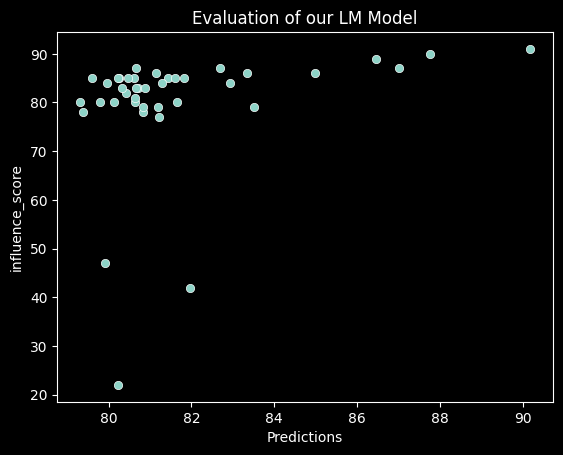

In [24]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of our LM Model")

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(y_test, predictions)))


Mean Absolute Error:  5.732721540565281
Mean Squared Error:  160.73415251146258
Root Mean Squared Error:  12.678097353761824


In [26]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("R-squared:", r2)


R-squared: 0.049300605083193894
